In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import fm2p

Loading DLC 2.3.7...
DLC loaded in light mode; you cannot use any GUI (labeling, relabeling and standalone GUI)


c:\Users\dmartins\anaconda3\envs\fm1\lib\site-packages\oasis\functions.py:13: UserWarning: Could not find cvxpy. Don't worry, you can still use OASIS, just not the slower interior point methods we compared to in the papers.
  warn("Could not find cvxpy. Don't worry, you can still use OASIS, " +


In [2]:
basepath = r'K:\Mini2P\241219_DMM_DMM037_freemoving'
rec_name = '241219_DMM_DMM037_freemoving_01'
session_props = r'K:\Mini2P\241219_DMM_DMM037_freemoving\session_props.json'

top = fm2p.Topcam(basepath, rec_name, props=session_props, rnum=1)
body_xyl, body_tracking_results = top.track_body()
# topvid = fm2p.pack_video_frames(top.top_avi)
# top.save_tracking(body_tracking_results, body_xyl, topvid)

twop = fm2p.TwoP(basepath, rec_name, props=session_props, rnum=1)
twop_dict = twop.calc_dFF()
# twop.save_fluor(twop_dict)

86.33960307728161


In [3]:
topdlc, _ = fm2p.open_dlc_h5(r'K:\Mini2P\241219_DMM_DMM037_freemoving\241219_DMM_DMM037_freemoving_01\241219_DMM_DMM037_freemoving_01_topdownTracking.h5')

In [4]:
np.sum(~np.isnan(body_tracking_results['head_yaw']))

3873

In [5]:
list(body_tracking_results.keys())

['speed',
 'head_yaw',
 'body_yaw',
 'body_head_diff',
 'movement_yaw',
 'movement_minus_body',
 'forward_run',
 'backward_run',
 'fine_motion',
 'stationary',
 'x',
 'y',
 'head_yaw_deg',
 'body_yaw_deg',
 'movement_yaw_deg',
 'x_displacement',
 'y_displacement']

In [9]:
topdlc.columns.values

array(['left_ear_x', 'left_ear_y', 'left_ear_likelihood', 'right_ear_x',
       'right_ear_y', 'right_ear_likelihood', 'base_tail_x',
       'base_tail_y', 'base_tail_likelihood', 'tl_corner_x',
       'tl_corner_y', 'tl_corner_likelihood', 'tr_corner_x',
       'tr_corner_y', 'tr_corner_likelihood', 'bl_corner_x',
       'bl_corner_y', 'bl_corner_likelihood', 'br_corner_x',
       'br_corner_y', 'br_corner_likelihood'], dtype=object)

In [8]:
np.nanmin(body_tracking_results['y'])

160.68534164428712

In [109]:
pxls2cm = 86.33960307728161

In [86]:
twop_dict.keys()

dict_keys(['raw_F0', 'norm_F0', 'raw_F', 'norm_F', 'raw_Fneu', 'raw_dFF', 'norm_dFF', 'denoised_dFF', 'spikes_per_sec', 'sp2_spks'])

In [92]:
sps = twop_dict['spikes_per_sec']
sps.shape

(435, 6000)

In [98]:
iscell = twop.suite2p_outputs['iscell']
sps = twop_dict['sp2_spks'][iscell[:,0]==1, :]

In [111]:
cmap = plt.cm.rainbow(np.linspace(0,1,360))

Text(0.5, 1.0, 'all frames')

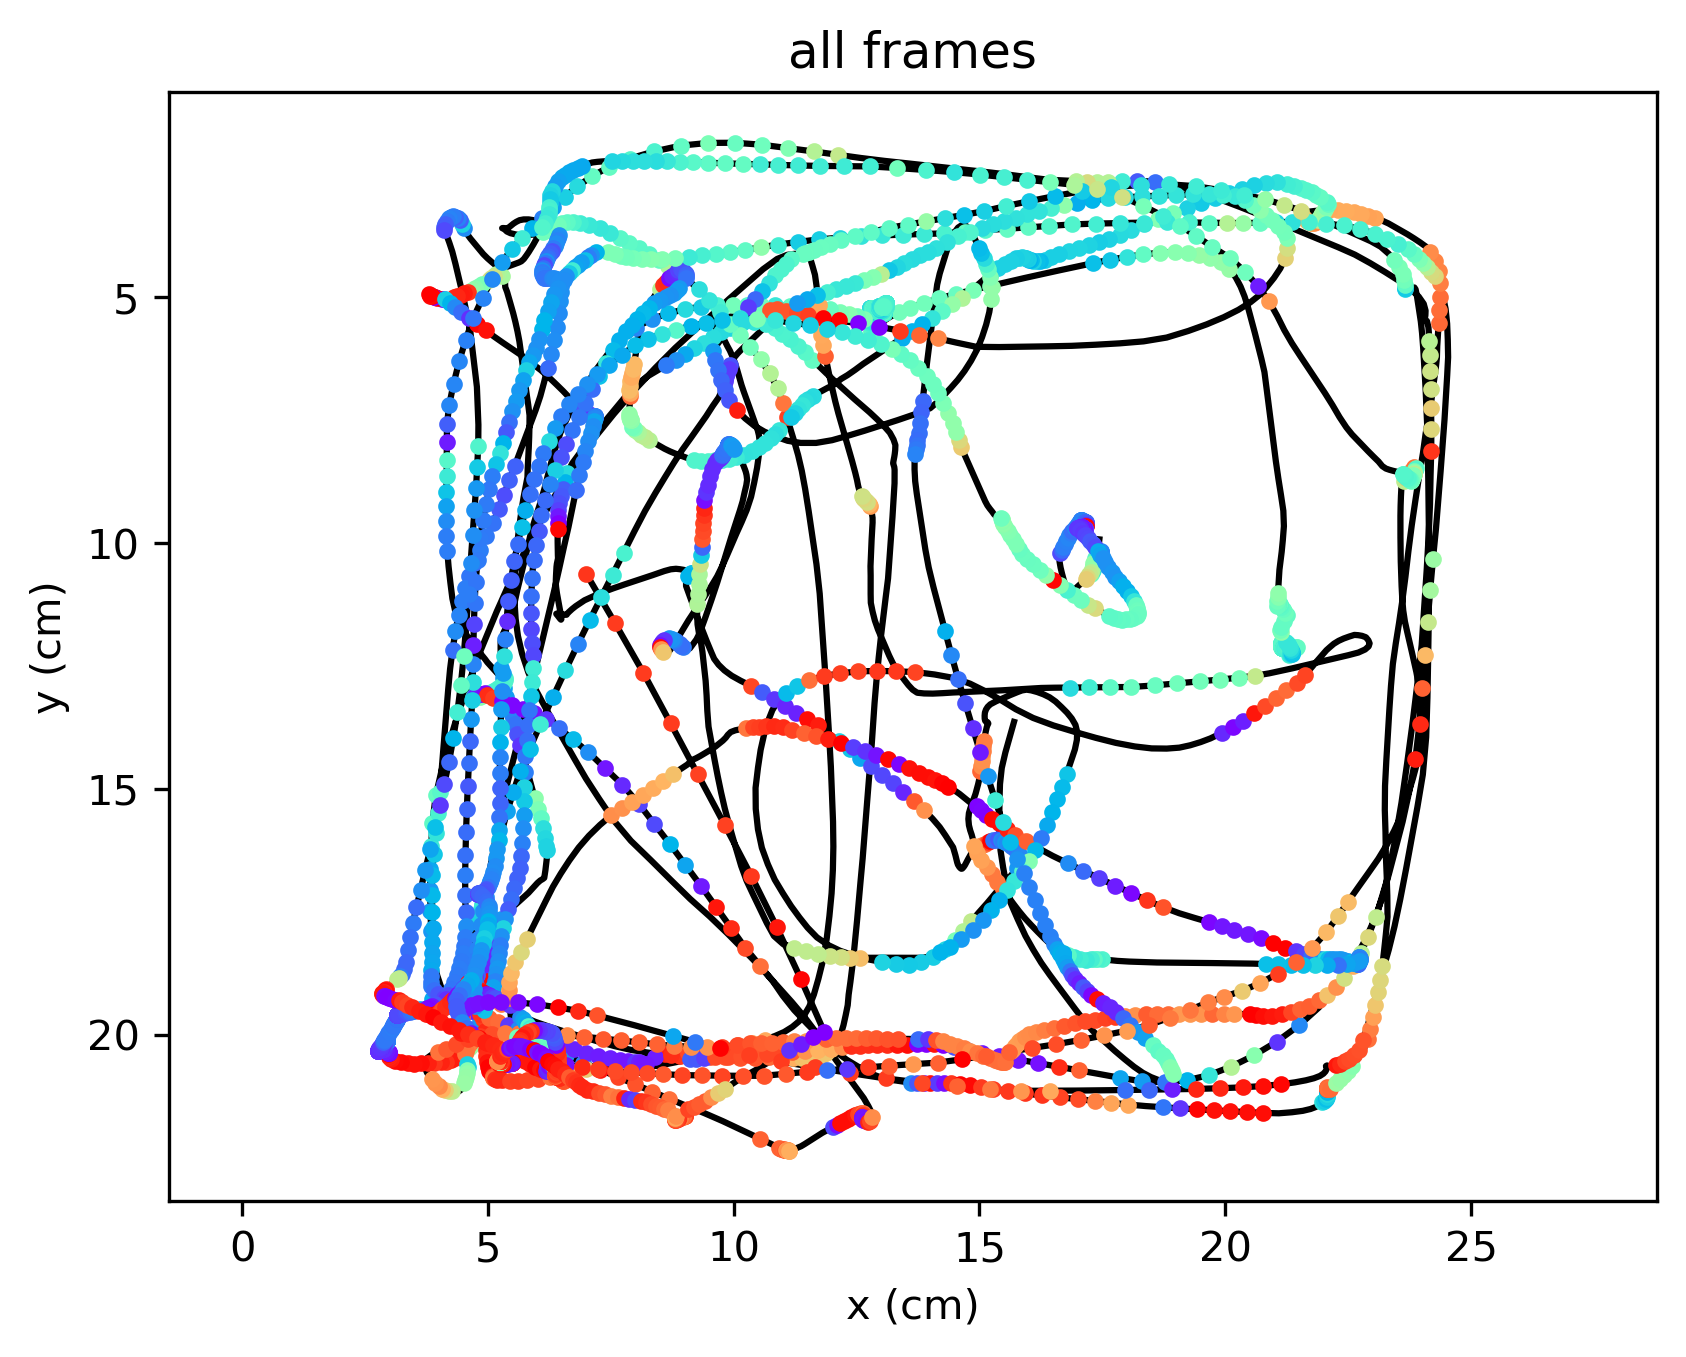

In [128]:
fig, ax = plt.subplots(1,1, dpi=300)
ax.axis('equal')
ax.plot(body_tracking_results['x'] / pxls2cm, body_tracking_results['y'] / pxls2cm, color='k')
for i in range(len(body_tracking_results['head_yaw_deg'])):
    if ~np.isnan(body_tracking_results['head_yaw_deg'][i]):
        ax.plot(body_tracking_results['x'][i] / pxls2cm, body_tracking_results['y'][i] / pxls2cm,
            'o', ms=3, color=cmap[int(body_tracking_results['head_yaw_deg'][i])])
ax.invert_yaxis()
ax.set_xlabel('x (cm)')
ax.set_ylabel('y (cm)')
ax.set_title('all frames')

Text(0.5, 1.0, '>25 sp/s')

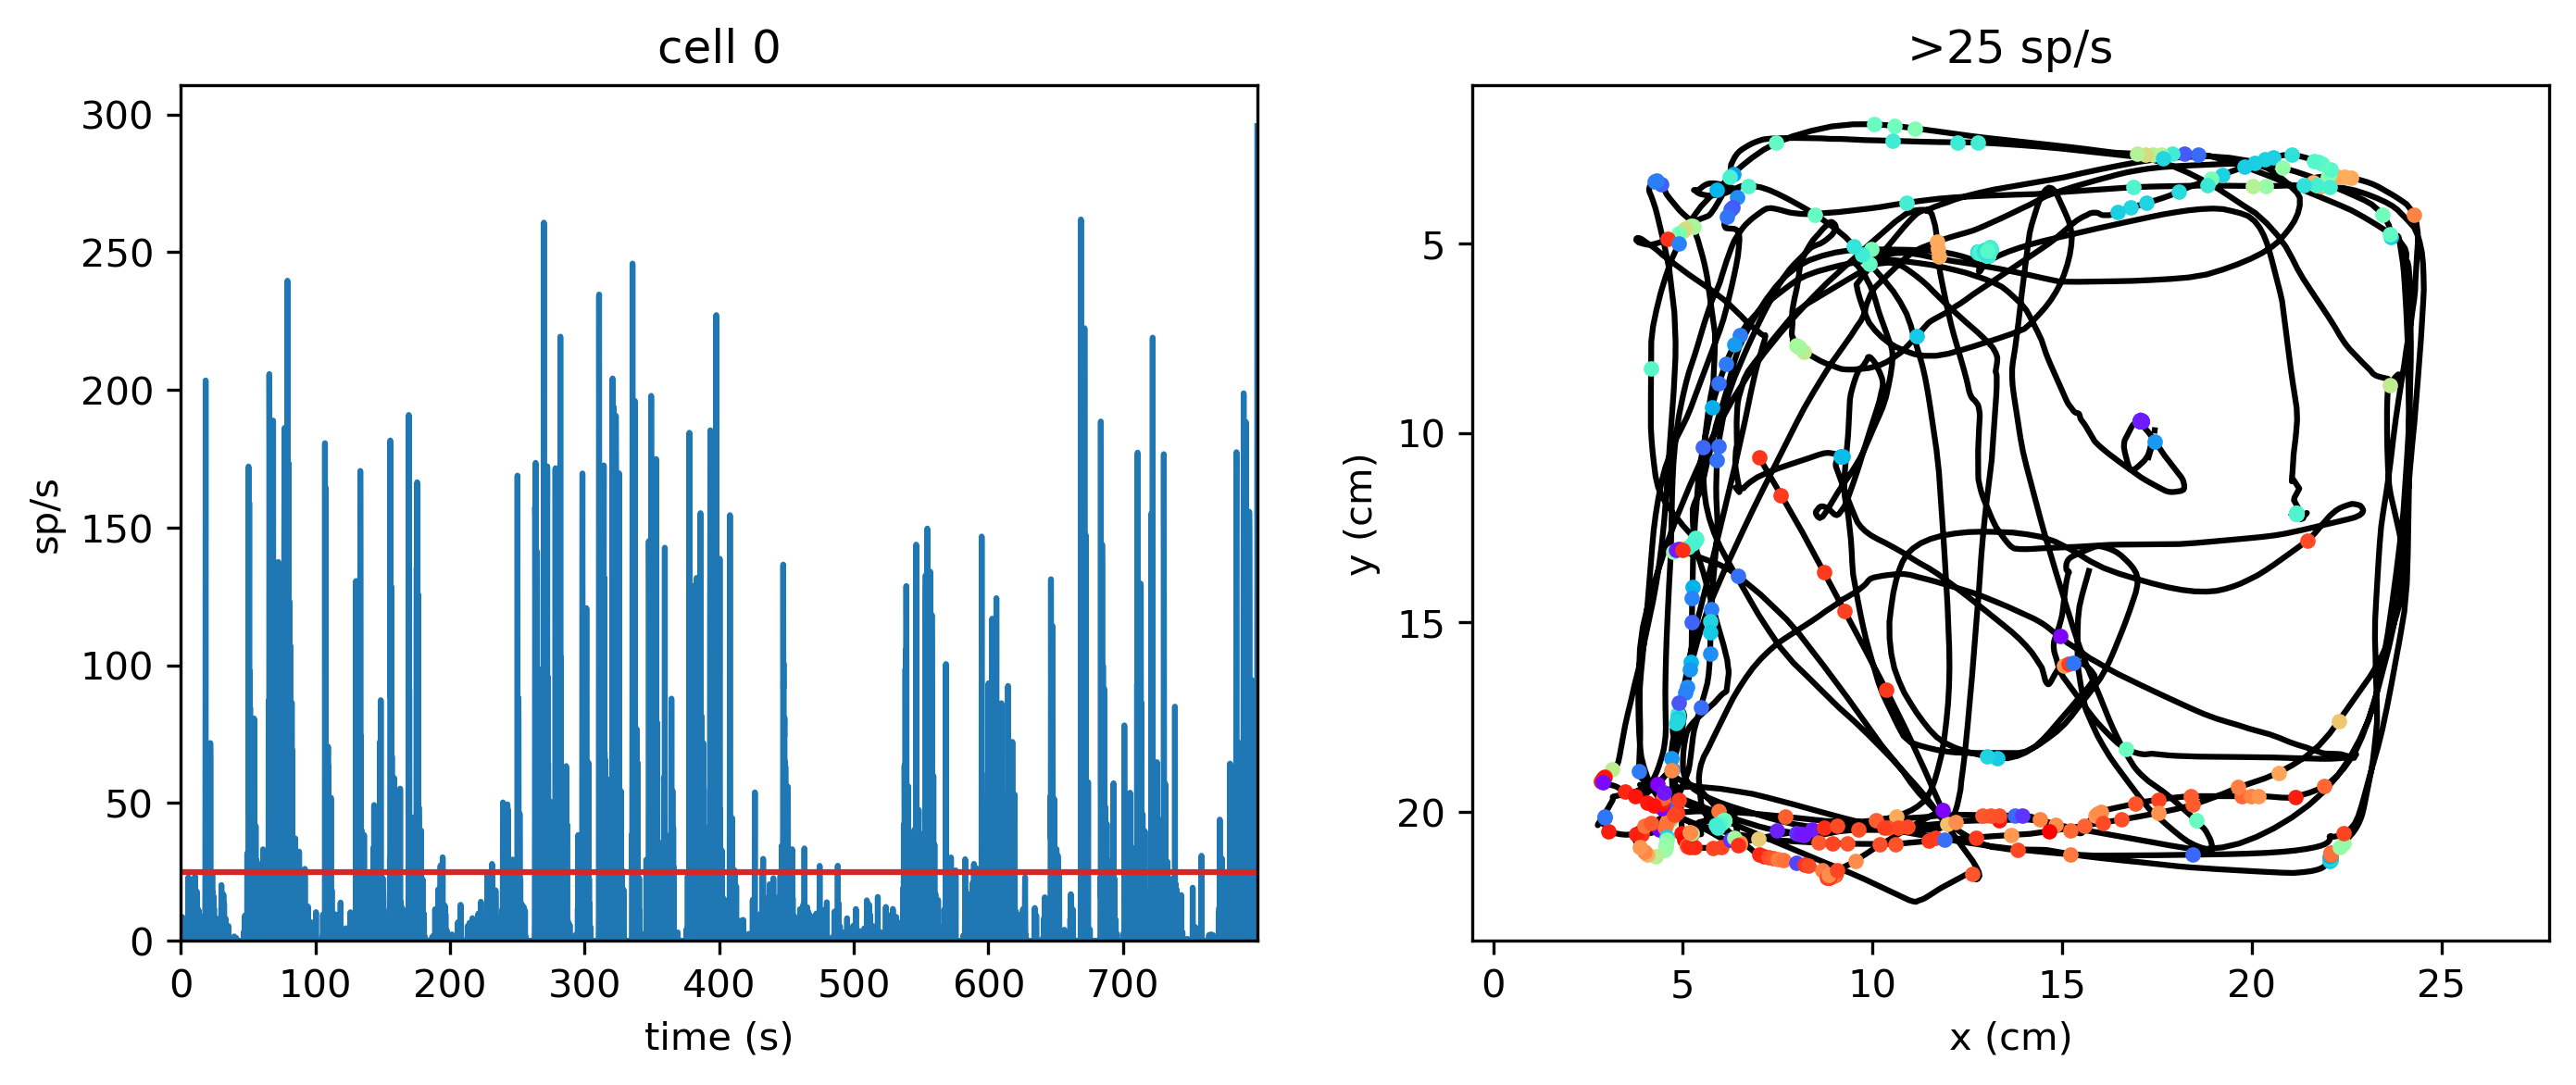

In [159]:
fig, [ax0,ax] = plt.subplots(1,2, figsize=(11,4), dpi=300)

cellind = 0
spikethresh = 25

sptime = np.arange(0, np.size(sps,1)*1/7.5, 1/7.5)

ax0.plot(sptime, sps[cellind,:])
ax0.hlines(25, 0, sptime[-1], color='tab:red')
ax0.set_xlim([0,sptime[-1]])
ax0.set_title('cell {}'.format(cellind))
ax0.set_xlabel('time (s)')
ax0.set_ylabel('sp/s')
ax0.set_ylim([0,np.max(sps[cellind,:])*1.05])


ax.axis('equal')
ax.plot(body_tracking_results['x'] / pxls2cm, body_tracking_results['y'] / pxls2cm, color='k')
for i in range(len(body_tracking_results['head_yaw_deg'])):
    if (~np.isnan(body_tracking_results['head_yaw_deg'][i])) and (sps[cellind,i]>spikethresh):
        ax.plot(body_tracking_results['x'][i] / pxls2cm, body_tracking_results['y'][i] / pxls2cm,
            'o', ms=3, color=cmap[int(body_tracking_results['head_yaw_deg'][i])])
ax.invert_yaxis()
ax.set_xlabel('x (cm)')
ax.set_ylabel('y (cm)')
ax.set_title('>25 sp/s')

In [117]:
body_tracking_results['x'][i] / pxls2cm, body_tracking_results['y'][i] / pxls2cm

(7.00550033081025, 10.63503740717192)

In [118]:
int(body_tracking_results['head_yaw_deg'][i])

335

In [105]:
histbins = [
    np.arange(
        np.nanmedian(topdlc['tl_corner_x']),
        np.nanmedian(topdlc['tr_corner_x'])+pxls2cm,
        pxls2cm), # 1 cm bins
    np.arange(
        np.nanmedian(topdlc['tl_corner_y']),
        np.nanmedian(topdlc['bl_corner_y'])+pxls2cm,
        pxls2cm
    )
]

H, xedges, yedges = np.histogram2d(
    x=body_tracking_results['x'],
    y=body_tracking_results['y'],
    bins=histbins
)

wH, _, _ = np.histogram2d(
    x=body_tracking_results['x'],
    y=body_tracking_results['y'],
    bins=histbins,
    weights=sps[1,:]
)

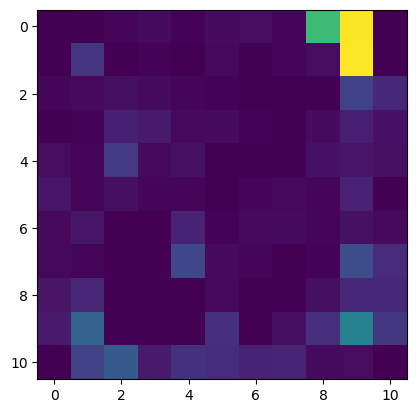

In [106]:
plt.imshow(wH)

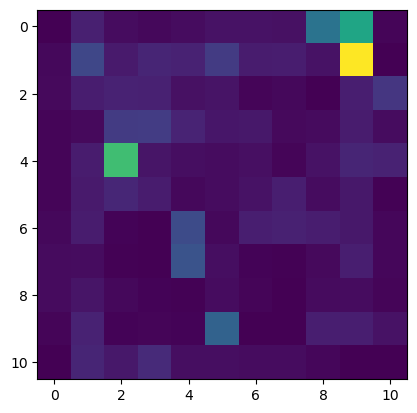

In [102]:
plt.imshow(H)

In [78]:
import scipy.stats

In [63]:
import sklearn

(3.0854751169166668, 25.08547405653729, 22.331291323817695, 1.029455619946022)

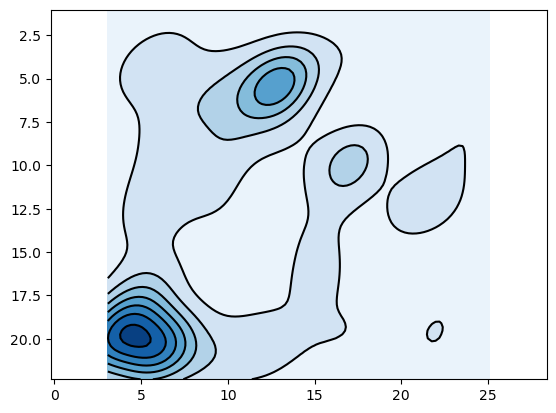

In [74]:
x = body_tracking_results['x'] / pxls2cm
y = body_tracking_results['y'] / pxls2cm
xmin = np.nanmedian(topdlc['tl_corner_x']) / pxls2cm
xmax = np.nanmedian(topdlc['tr_corner_x']) / pxls2cm
ymin = np.nanmedian(topdlc['tl_corner_y']) / pxls2cm
ymax = np.nanmedian(topdlc['bl_corner_y']) / pxls2cm
xx, yy = np.mgrid[xmin:xmax:100j, ymin:ymax:100j]
values = np.vstack([x, y])
values = values[:,np.sum(np.isnan(values), axis=0)==0]
kernel = scipy.stats.gaussian_kde(values)
positions = np.vstack([xx.ravel(), yy.ravel()])
f = np.reshape(kernel(positions).T, xx.shape)
fig, ax = plt.subplots(1,1)
cfset = ax.contourf(xx, yy, f, cmap='Blues')
cset = ax.contour(xx, yy, f, colors='k')
# ax.clabel(cset, inline=1, fontsize=10)
ax.invert_yaxis()
ax.axis('equal')

In [41]:
fig, ax = plt.subplots(1,1)
im = NonUniformImage(ax, interpolation='bilinear', cmap='gray')
xcenters = (xedges[:-1] + xedges[1:]) / 2
ycenters = (yedges[:-1] + yedges[1:]) / 2
im.set_data(xcenters, ycenters, H)
ax.add_image(im)

TypeError: cannot unpack non-iterable NoneType object

<Figure size 640x480 with 1 Axes>

In [ ]:
plt.plot(body_tracking_results['head_yaw_deg'])

In [5]:
twop = fm2p.read_h5(r'K:\Mini2P\241219_DMM_DMM037_freemoving\241219_DMM_DMM037_freemoving_01\241219_DMM_DMM037_freemoving_01_twophoton.h5')
top = fm2p.read_h5(r'K:\Mini2P\241219_DMM_DMM037_freemoving\241219_DMM_DMM037_freemoving_01\241219_DMM_DMM037_freemoving_01_top_tracking.h5')

In [8]:
x_vals, y_vals, likelihood = fm2p.split_xyl(topdlc)

# Threshold by likelihoods
x_vals = fm2p.apply_liklihood_thresh(x_vals, likelihood, threshold=0.8)
y_vals = fm2p.apply_liklihood_thresh(y_vals, likelihood, threshold=0.8)

In [ ]:
['{} {:.03}% good'.format(c, (np.sum(~np.isnan(x_vals[c]))/len(x_vals[c]))*100) for c in x_vals.columns.values]